<a href="https://colab.research.google.com/github/Coder731/machine-learning-project/blob/main/SLF_Project_LearnerNotebook_LowCode_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext nb_black


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
from string import Template
data = pd.read_csv("used_device_data.csv")
print(
    '\n___________________1\n',
    'data.head(2):\n',
    data.head(2),
    '\n___________________2\n',
    'data.shape:\n',
    data.shape,
    '\n___________________3\n',
    'data.info():\n',
    data.info(),
    '\n___________________4\n',
    'data.describe().T:\n',
    data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [2]:
# duplicates
headings_list=list(data.columns.values)
countT=0
countF=0
a=0
holder={'a':'0','b':'1'}
string_holder=' : '
holder_duplicates_counted={}

# then run for loop:
for head_n, heading in enumerate(headings_list):
  hold_key=heading
  strg_var='\"{}\"'.format(heading)
  hold_value=headings_list[head_n] # hold_value=list[#]
  col_el_1=data[headings_list[head_n]].head(1).to_string(index=False) # col_hold=df[list[#]]
  # hold_value_3=headings_list['{}'.format(strg_var)] # hold_value_3=headings_list["heading"]
  # print("col_el_1:",col_el_1)
   # put strg_var between square brackets
  current_col_headg_in_brakts_n_quotes='[{}]'.format(strg_var)
  print("current_col_headg_in_brakts_n_quotes:",current_col_headg_in_brakts_n_quotes)
  data_col_i=data[Template("$obj").substitute(obj=heading)].head(2).to_string(index=False)
  # print("data_col_i (first 2 row(cell)values in col):")
  # print(data_col_i)
  print("data[",Template("$heading").substitute(heading=heading),"].unique():\n",data[heading].unique(),sep="")
  print("")

  # pre variable(s):
  outer_key=heading
  # assemble dictionary within dictionary (depth of 2 at least):
  Template("$outer_key").substitute(outer_key=outer_key)
  # heading1 : value_is_inner_dictionary
  # inner_dictionary is:
  # key : value
  
  # if head_n==1:
  #   break

current_col_headg_in_brakts_n_quotes: ["brand_name"]
data[brand_name].unique():
['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO']

current_col_headg_in_brakts_n_quotes: ["os"]
data[os].unique():
['Android' 'Others' 'iOS' 'Windows']

current_col_headg_in_brakts_n_quotes: ["screen_size"]
data[screen_size].unique():
[14.5  17.3  16.69 25.5  15.32 16.23 13.84 15.77 15.47 15.9  16.74 25.43
 20.32 15.29 12.88 15.24 15.37 16.71 25.6  15.34 16.59 16.81 20.42 10.16
 17.78 17.32 15.39 12.7  15.44  5.28 15.27 15.8  15.72 12.83  7.62  7.75
 10.03 15.42 16.56  5.18 16.64 16.94 16.33 10.29 16.43 12.93 16.36 16.66
 16.21 17.5  16.13 16.28 14.4  15.21 20.12 16.89 16.48 16.31 25.53 12.73
 20.55 30.71 27.94 25.45 18.01 14.35 16.15 23.04 10.34 10.24 12.78 

<IPython.core.display.Javascript object>

TODO:
get duplicated values list for each column
=)
if duplicated = True 
- for each value
- in a column
- for first value only
update dict / append to list
of duplicates
duplicates = []
or
duplicates={key_is_entry_which_is_duplicated:value_is_incrementing_count_of_duplicated_entry}
CURRENT
Replicate first key :value .update()

In [3]:
# begin assembling holder dictionary for heading key and True/False value:
# holder={ heading : data[heading].duplicated() }
# holder.append() # only works on list use update for dictionary:
# holder.update({"heading": "data[heading].duplicated()"})
duplicate_boolean=data[heading].duplicated().to_string(index=False)
holder.update({Template("$heading").substitute(heading=heading): Template("$duplicate_boolean").substitute(duplicate_boolean=duplicate_boolean)})
# holder={}
print(holder)

{'a': '0', 'b': '1', 'normalized_new_price': 'False\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\nFalse\n True\nFalse\nFalse\nFalse\nFa

<IPython.core.display.Javascript object>

In [4]:
holder_duplicates_counted={}
outer_key=heading
Template("$outer_key").substitute(outer_key=outer_key)

'normalized_new_price'

<IPython.core.display.Javascript object>

In [5]:
data[heading].duplicated().head(4).to_string(index=False)

'False\nFalse\nFalse\nFalse'

<IPython.core.display.Javascript object>

Check for duplicates for single iteration of 1st for loop - DONE

TODO
1
insert second for loop 
into 
first for loop

2
amalgamate
code cells
used in 
making
2nd for loop
into
single block of code
to be incorporated
into first for loop

In [6]:
current_count_dict={}
for val_count, value in enumerate(data[heading].duplicated()) :
    # print(value)
    if value == True:
        current_count_dict.update({Template("$val_count").substitute(val_count=val_count) : Template("$value").substitute(value=value)})
# print(current_count_dict)
print(len(current_count_dict))
print(len(data[heading].duplicated()))

466
3454


<IPython.core.display.Javascript object>

In [7]:
len(data[heading].duplicated()) - len(current_count_dict)

2988

<IPython.core.display.Javascript object>

In [8]:
data[heading].unique()

array([4.71510025, 5.51901794, 5.88463072, ..., 6.25153773, 4.62418819,
       4.27999391])

<IPython.core.display.Javascript object>

In [9]:
len(data[heading].unique())

2988

<IPython.core.display.Javascript object>

In [10]:
# difference between number of duplicated values in column and number of values shown as True equals the number of unique values in the column
# That is, once duplicates are removed, only unique values remain (by definition) 
len(data[heading].duplicated()) - len(current_count_dict)==len(data[heading].unique())

True

<IPython.core.display.Javascript object>

TODO: next assemble key and value into holder variable
    - why? - to show if duplicates
    - how?
    - note intermediate step: check if col (row?) has duplicates
    in above loop
        key-value-pair:
        part 1 of 3: key
        part 2 of 3: string_holder=' : '
        part 3 of 3: value

    column_x : 'False'

    then push this as a key value pair to holder variable
        - iteratively

1.
So, key is not col_el_1{is actually .to_string(index= False) to remove excess output} but 
current_col_headg_in_brakts_n_quotes{["word"]}
(technically just: strg_var{"word"}
[or just heading{word alone}])

2.
check for duplicates per row
potentially, just: .duplicates(data[strg_val])
or .duplicates(data current_col_headg_in_brakts_n_quotes) # without space, so concatenated
i.e. .duplicates()

2.1
https://www.digitalocean.com/community/tutorials/python-string-concatenation
a= 'asdf'
b= 'lkjh'
c= a + b
print(c)
Output: asdflkjh

3.
then need to set key and value
or push key value to dictionary

In [11]:
# https://pythonprinciples.com/ask/how-do-you-create-a-variable-number-of-variables/
my_vars = {}
for i in range(10):
    var_name = "var%d" % i
    my_vars[var_name] = i

print(my_vars["var2"])
print(my_vars)

2
{'var0': 0, 'var1': 1, 'var2': 2, 'var3': 3, 'var4': 4, 'var5': 5, 'var6': 6, 'var7': 7, 'var8': 8, 'var9': 9}


<IPython.core.display.Javascript object>

In [12]:
data[heading].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451     True
3452    False
3453    False
Name: normalized_new_price, Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

duplicates final answer:

In [13]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [14]:
duplicates_list=data.duplicated()

<IPython.core.display.Javascript object>

In [15]:
recount_True=0
for duplicate_index_recount, duplicate_boolean_recount in enumerate(duplicates_list):
    if (duplicate_boolean_recount==True):
        recount_True+=1


<IPython.core.display.Javascript object>

In [16]:
print(recount_True)

0


<IPython.core.display.Javascript object>

as recount_True is 0, there are duplicates in the data dataset

now go one level deeper with duplicate check:

In [17]:
# how many?

<IPython.core.display.Javascript object>

In [18]:
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

15 columns in data set

just do first heading instance first:

In [19]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==0):
        print('heading ', count_3, ' is ', heading_count_3, sep='')
    if (count_3==0):
        break

heading 0 is brand_name


<IPython.core.display.Javascript object>

for brand_name: implement the following code block:

In [20]:
# heading_1 = brand_name
# make it def function :
def heading_1():
    duplicates_list=data['brand_name'].duplicated()

    recount_True=0
    for duplicate_index_recount, duplicate_boolean_recount in enumerate(duplicates_list):
        if (duplicate_boolean_recount==True):
            recount_True+=1

    print(recount_True)
    print(duplicates_list)
    print(len(duplicates_list))
heading_1()

3420
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: brand_name, Length: 3454, dtype: bool
3454


<IPython.core.display.Javascript object>

In [21]:
'''
 do a check 
 to see if 3420 is actually the number of duplicates.
 also check length of the data set

 - DONE
'''

'\n do a check \n to see if 3420 is actually the number of duplicates.\n also check length of the data set\n\n - DONE\n'

<IPython.core.display.Javascript object>

In [22]:
# copy def (not call) of function heading_1
# use next function for headings 2 through 15:

def heading_2_to_15(heading):
    duplicates_list=data[heading].duplicated()

    recount_True=0
    for duplicate_index_recount, duplicate_boolean_recount in enumerate(duplicates_list):
        if (duplicate_boolean_recount==True):
            recount_True+=1

    print('recount_True:',recount_True)
    print('duplicates_list:')
    print(duplicates_list)
    print('duplicates_list:',len(duplicates_list))


<IPython.core.display.Javascript object>

In [23]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==1):
        print('heading modified count ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==1):
        break

heading modified count 2 is os


<IPython.core.display.Javascript object>

In [24]:
# call function 
heading_2_to_15('os') # (heading 2 is os)

recount_True: 3450
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: os, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [25]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==2):
        print('heading modified count ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==2):
        break

heading modified count 3 is screen_size


<IPython.core.display.Javascript object>

In [26]:
heading_2_to_15('screen_size') # (heading 3 is screen_size)

recount_True: 3312
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: screen_size, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [27]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==3):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==3):
        break

heading 4 is 4g


<IPython.core.display.Javascript object>

In [28]:
heading_2_to_15('4g') # (heading 4 is 4g)

recount_True: 3452
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: 4g, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [29]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==4):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==4):
        break

heading 5 is 5g


<IPython.core.display.Javascript object>

In [30]:
heading_2_to_15('5g') # (heading 5 is 5g)

recount_True: 3452
duplicates_list:
0       False
1       False
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: 5g, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [31]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==5):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==5):
        break
heading_2_to_15(heading_count_3) # (heading 6 is main_camera_mp)

heading 6 is main_camera_mp
recount_True: 3412
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: main_camera_mp, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [32]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==6):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==6):
        break
heading_2_to_15(heading_count_3) # (heading 7 is selfie_camera_mp)

heading 7 is selfie_camera_mp
recount_True: 3416
duplicates_list:
0       False
1       False
2       False
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: selfie_camera_mp, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [33]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==7):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==7):
        break
heading_2_to_15(heading_count_3)

heading 8 is int_memory
recount_True: 3438
duplicates_list:
0       False
1       False
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: int_memory, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [34]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==8):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==8):
        break
heading_2_to_15(heading_count_3)

heading 9 is ram
recount_True: 3441
duplicates_list:
0       False
1       False
2        True
3       False
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: ram, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [35]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==9):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==9):
        break
heading_2_to_15(heading_count_3)

heading 10 is battery
recount_True: 3129
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: battery, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [36]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==10):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==10):
        break
heading_2_to_15(heading_count_3)

heading 11 is weight
recount_True: 2898
duplicates_list:
0       False
1       False
2        True
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: weight, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [37]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==11):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==11):
        break
heading_2_to_15(heading_count_3)

heading 12 is release_year
recount_True: 3446
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: release_year, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [38]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==12):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==12):
        break
heading_2_to_15(heading_count_3)

heading 13 is days_used
recount_True: 2530
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452    False
3453     True
Name: days_used, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [39]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==13):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==13):
        break
heading_2_to_15(heading_count_3)

heading 14 is normalized_used_price
recount_True: 360
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453     True
Name: normalized_used_price, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [40]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==14):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==14):
        break
heading_2_to_15(heading_count_3)

heading 15 is normalized_new_price
recount_True: 466
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451     True
3452    False
3453    False
Name: normalized_new_price, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

checkpoint for 15 heading _ s run - DONE

In [41]:
# len(duplicates_list)

<IPython.core.display.Javascript object>

In [42]:
# if len(duplicates_list)==countF:
#   print("all values are False")

<IPython.core.display.Javascript object>

In [43]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [44]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []


<IPython.core.display.Javascript object>

### Checking for missing values

In [45]:
data.duplicated() ## Complete the code to check duplicate entries in the data

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [46]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate Analysis

In [47]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [48]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [49]:
%matplotlib inline

<IPython.core.display.Javascript object>

In [50]:
plt.show()  # show the plot

<IPython.core.display.Javascript object>

27/01/2022 0056 h checkpoint

**`normalized_used_price`**

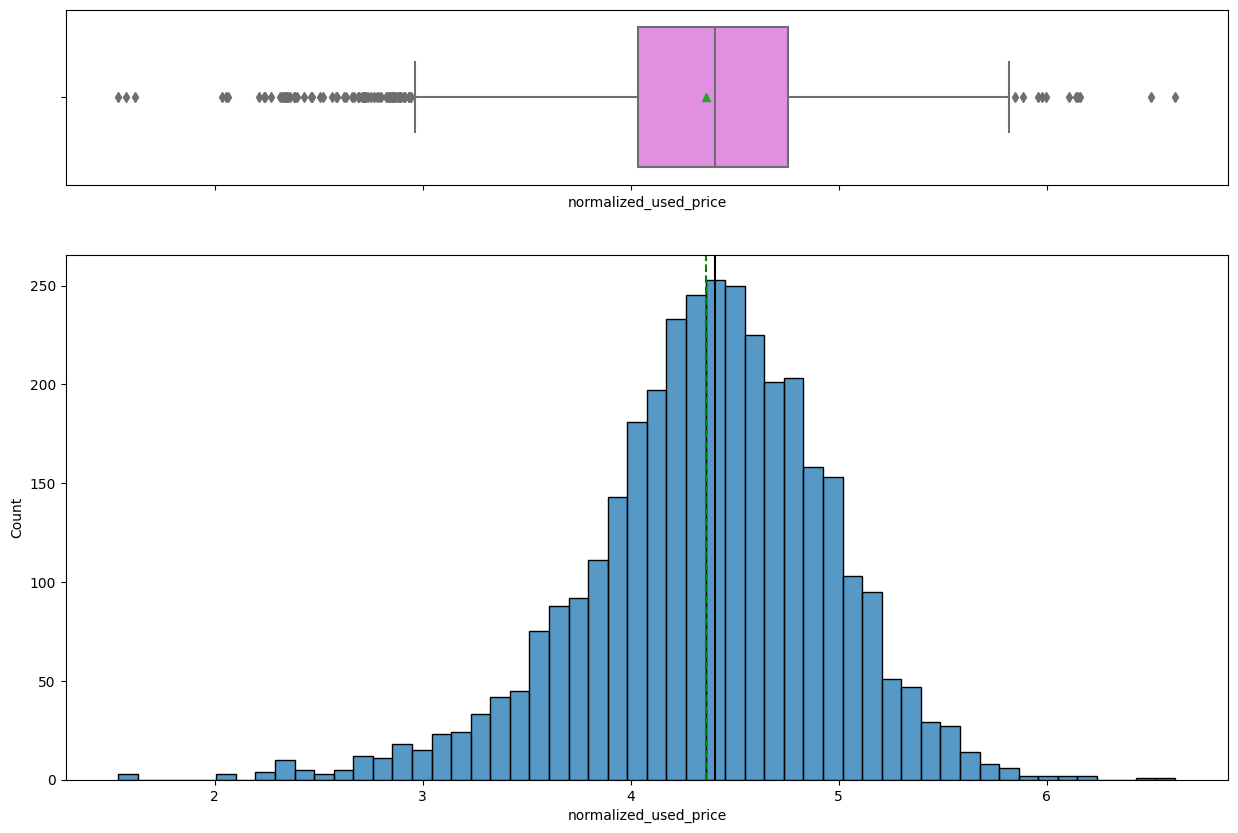

<IPython.core.display.Javascript object>

In [51]:
histogram_boxplot(df, "normalized_used_price")

**`normalized_new_price`**

checkpoint 2 27Jan2022 0122 h

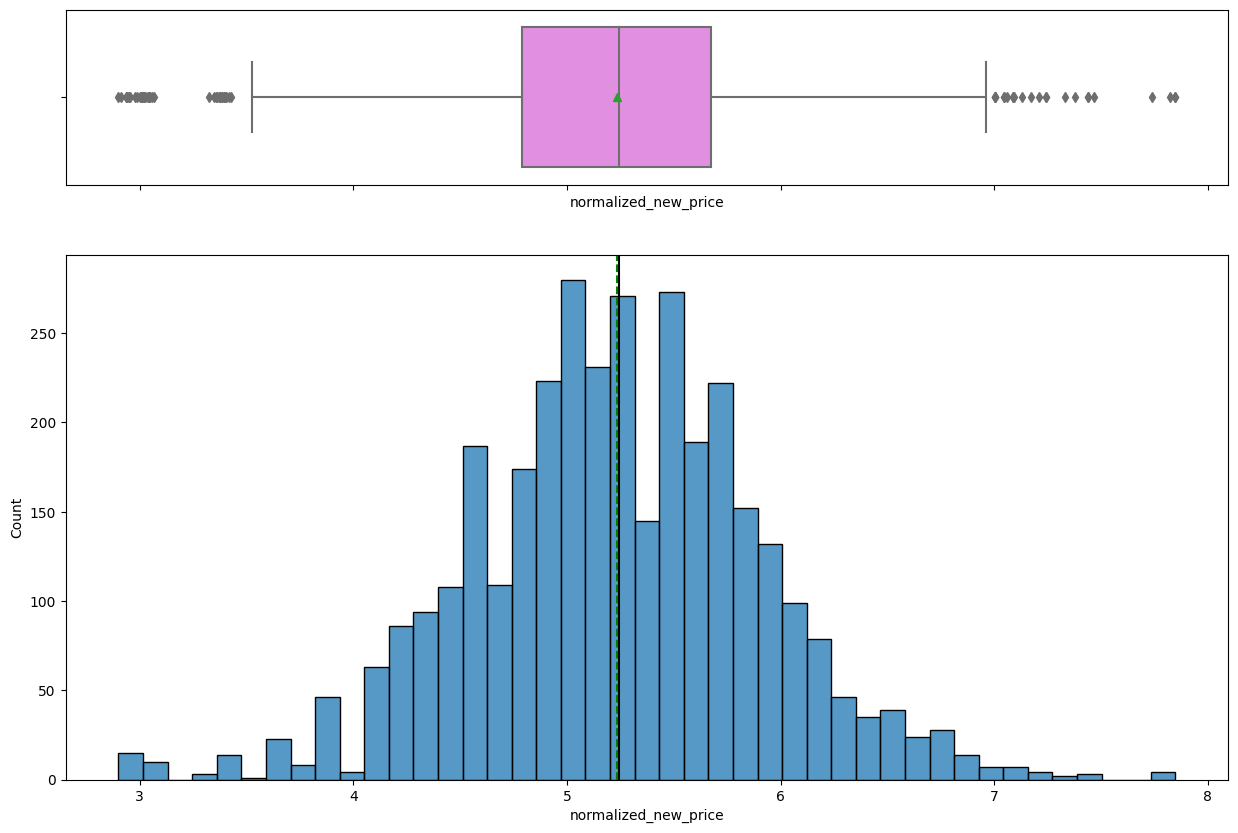

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(df, 'normalized_new_price')  ## Complete the code to create histogram_boxplot for 'normalized_new_price'

**`screen_size`**

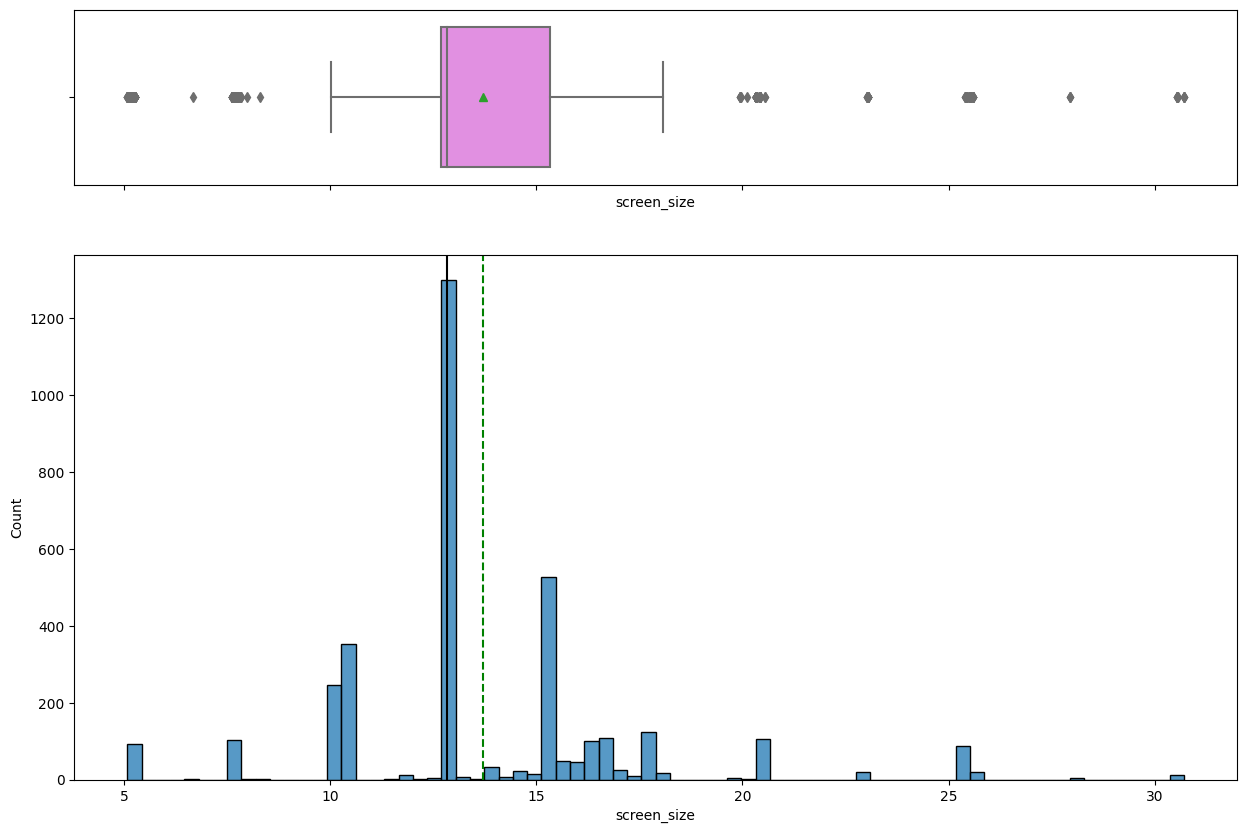

<IPython.core.display.Javascript object>

In [60]:
histogram_boxplot(df, 'screen_size')  ## Complete the code to create histogram_boxplot for 'screen_size'

**`main_camera_mp`**

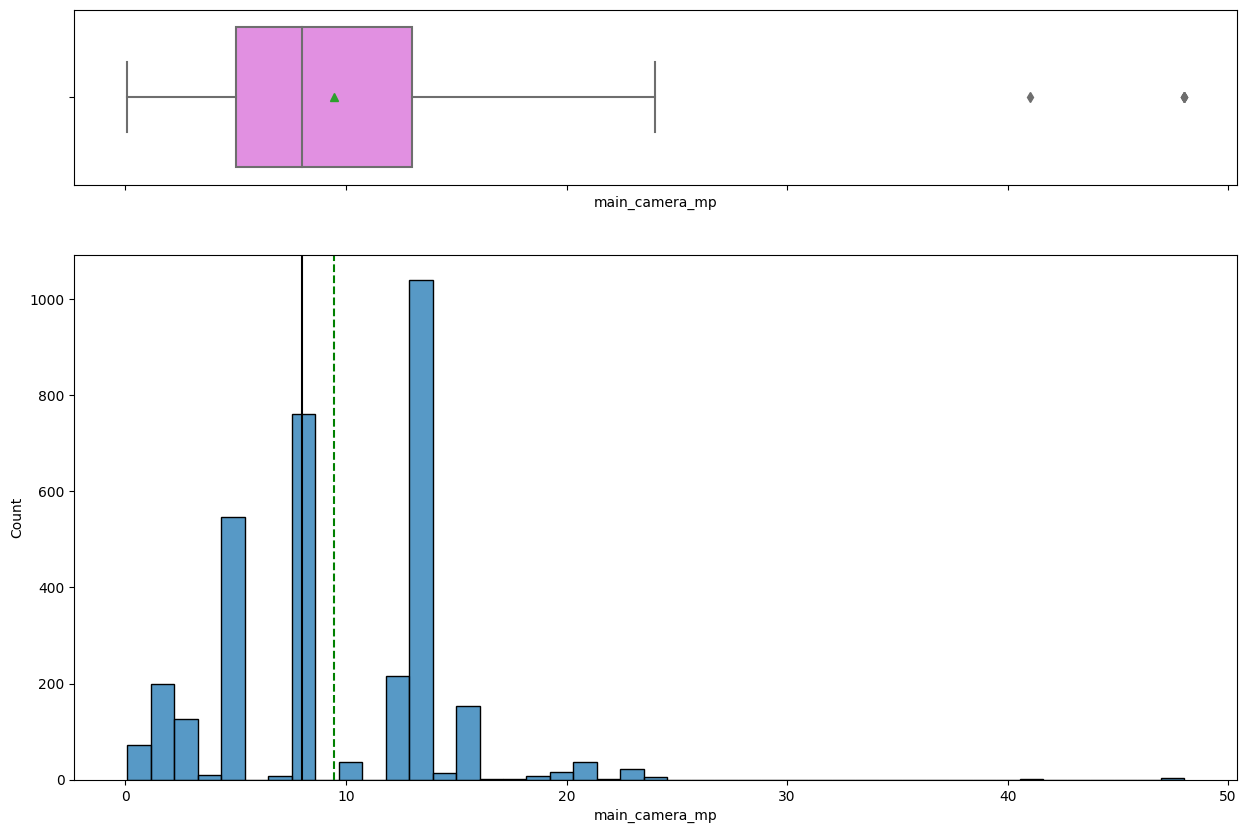

<IPython.core.display.Javascript object>

In [61]:
histogram_boxplot(df, 'main_camera_mp')  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

**`selfie_camera_mp`**

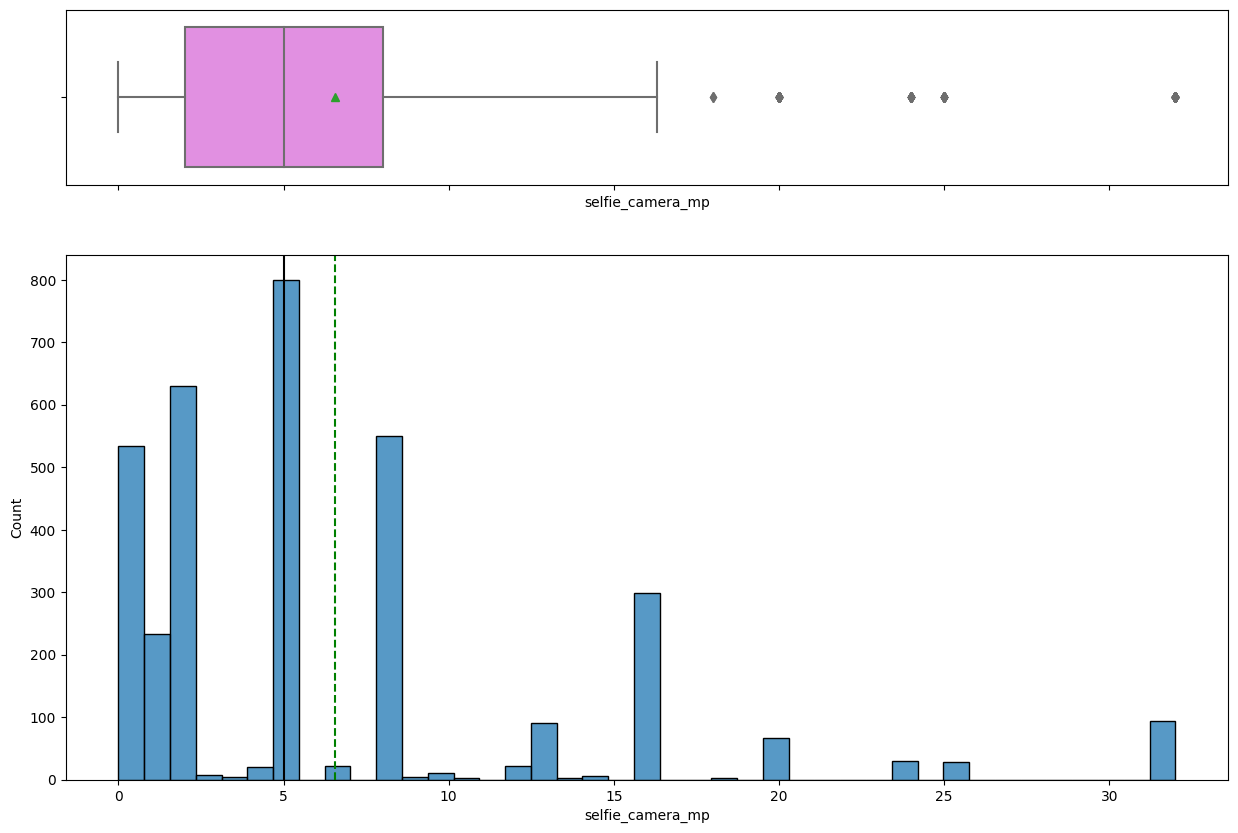

<IPython.core.display.Javascript object>

In [62]:
histogram_boxplot(df, 'selfie_camera_mp')  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

**`int_memory`**

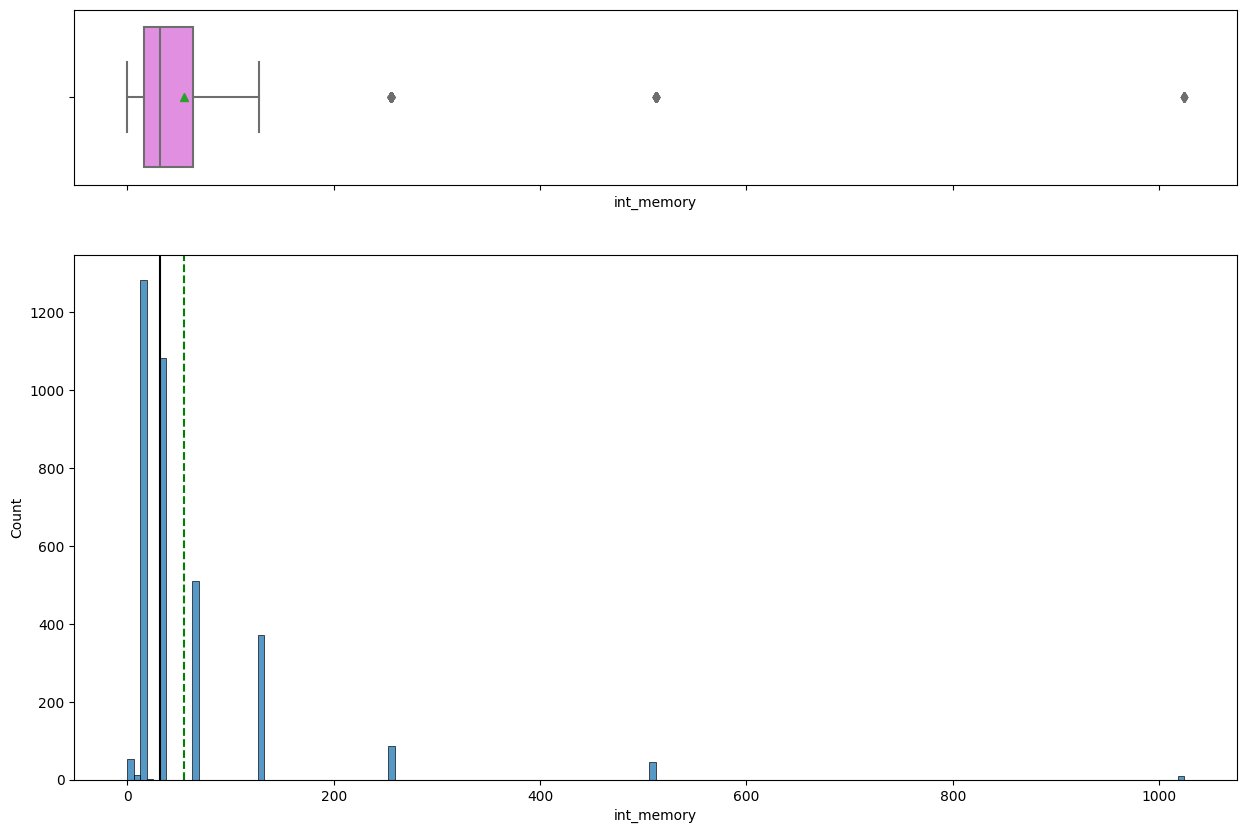

<IPython.core.display.Javascript object>

In [63]:
histogram_boxplot(df, 'int_memory')  ## Complete the code to create histogram_boxplot for 'int_memory'

**`ram`**

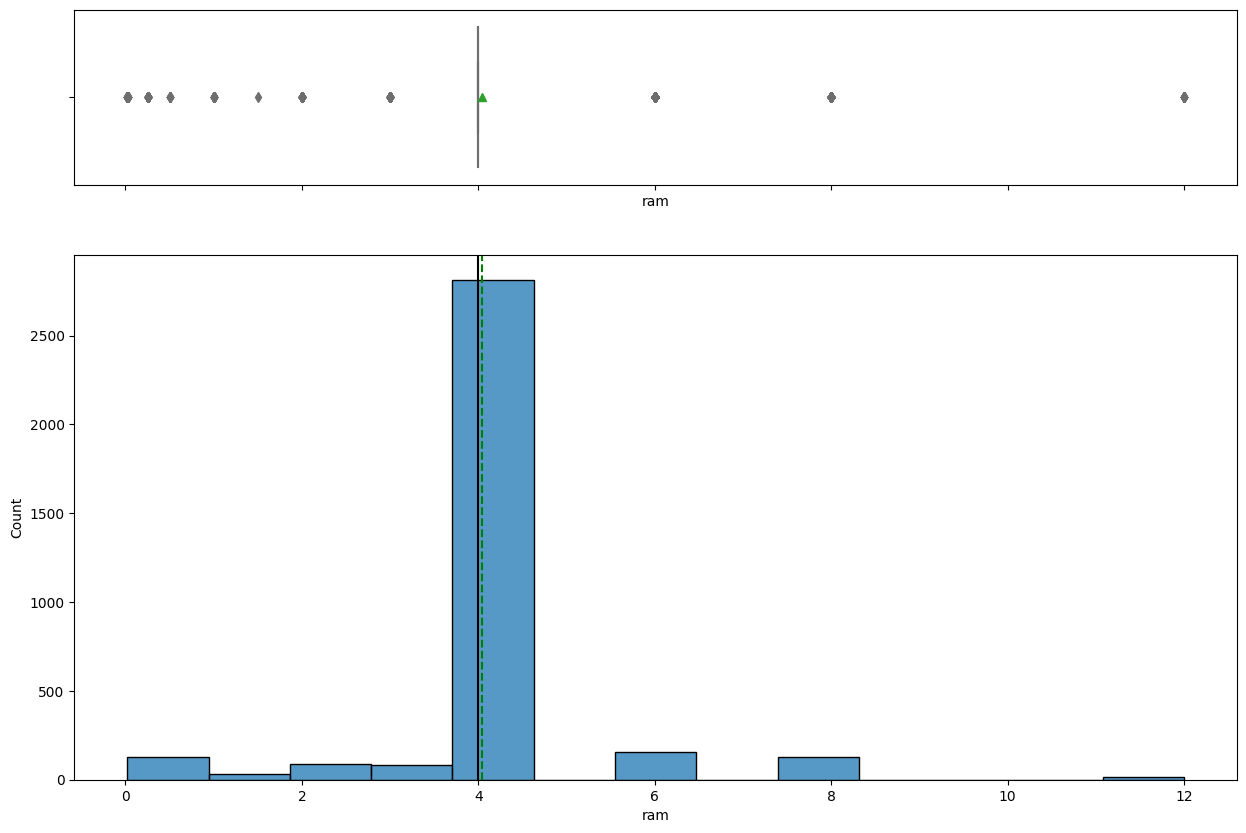

<IPython.core.display.Javascript object>

In [64]:
histogram_boxplot(df, 'ram')  ## Complete the code to create histogram_boxplot for 'ram'

**`weight`**

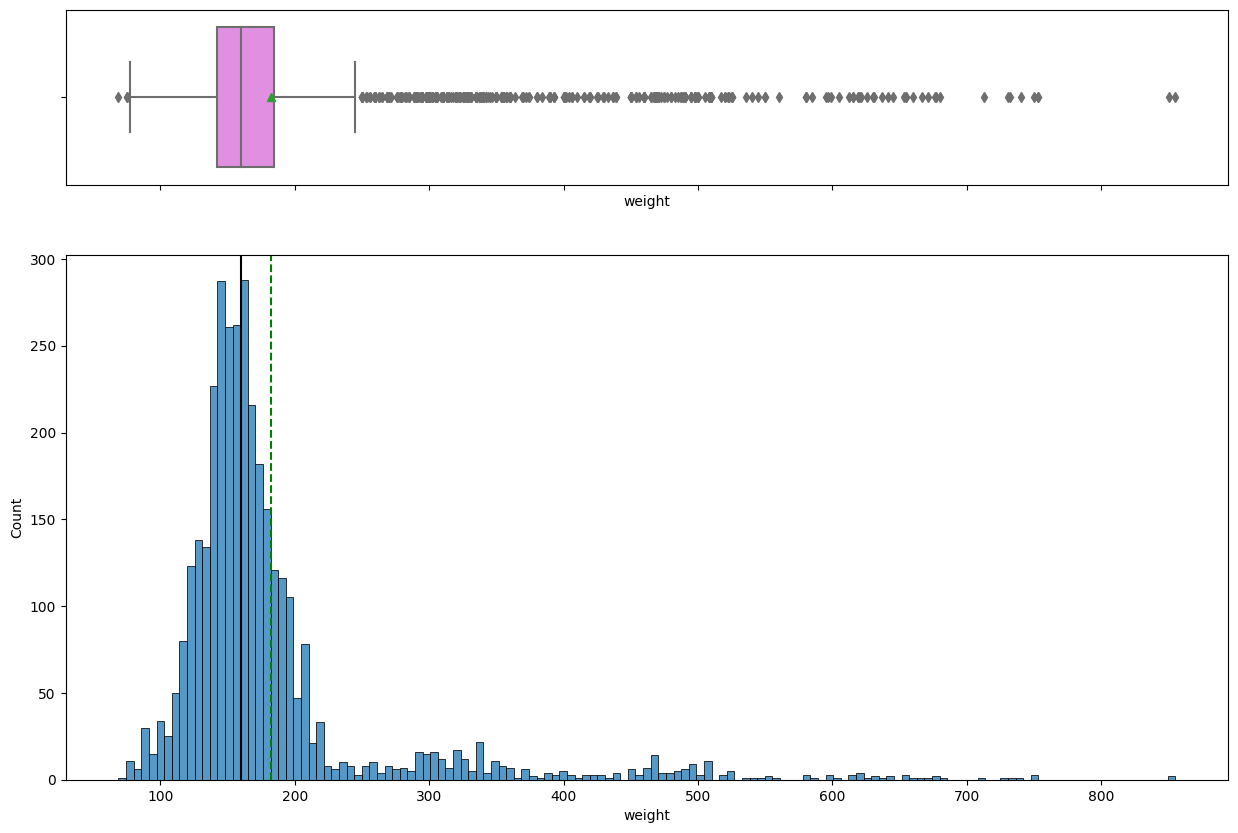

<IPython.core.display.Javascript object>

In [65]:
histogram_boxplot(df, 'weight')  ## Complete the code to create histogram_boxplot for 'weight'

**`battery`**

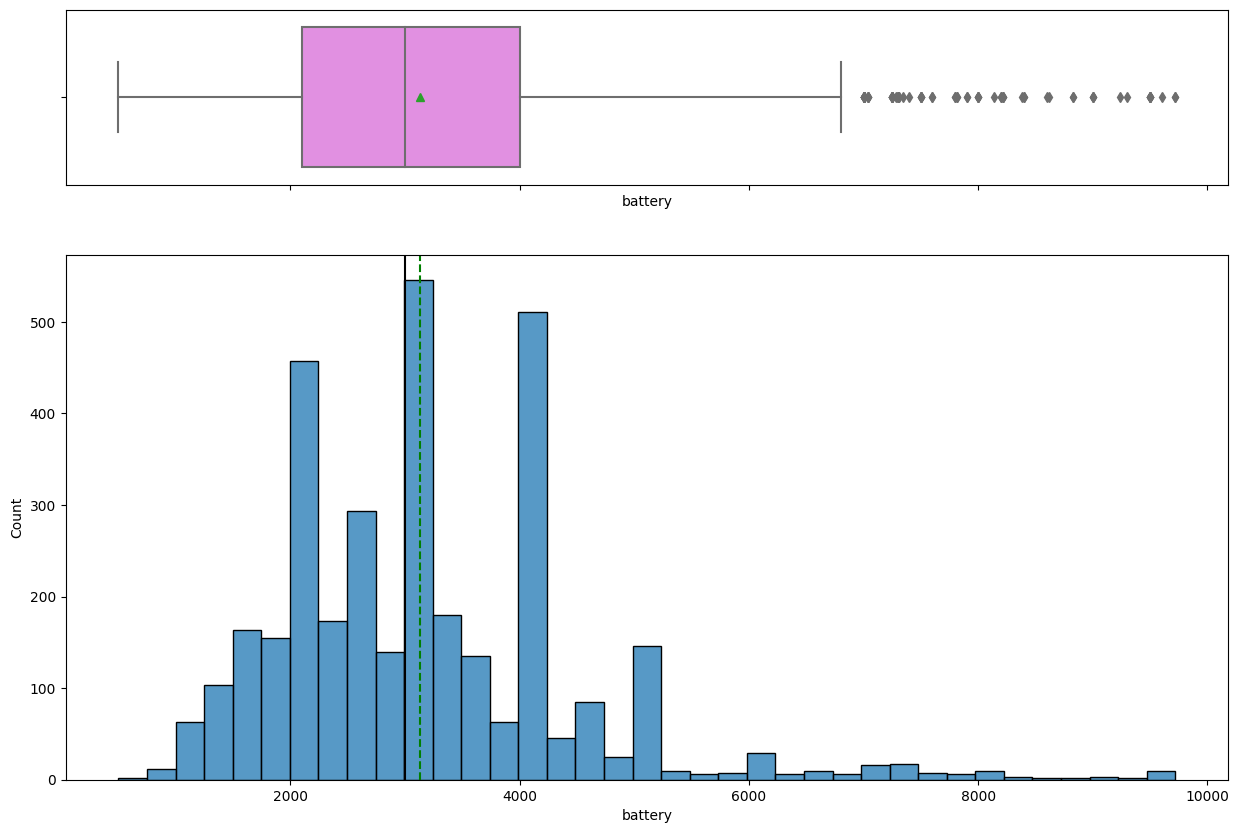

<IPython.core.display.Javascript object>

In [66]:
histogram_boxplot(df, 'battery')  ## Complete the code to create histogram_boxplot for 'battery'

**`days_used`**

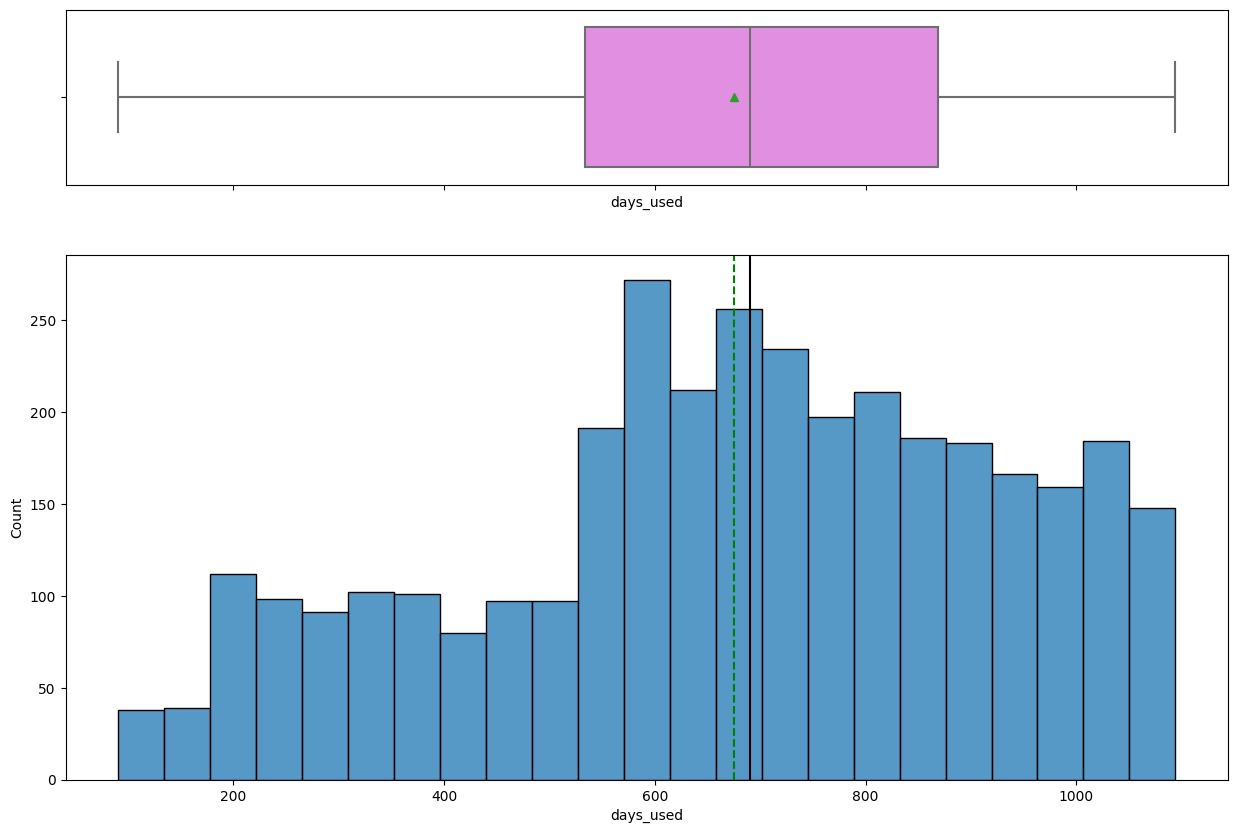

<IPython.core.display.Javascript object>

In [67]:
histogram_boxplot(df, 'days_used')  ## Complete the code to create histogram_boxplot for 'days_used'

**`brand_name`**

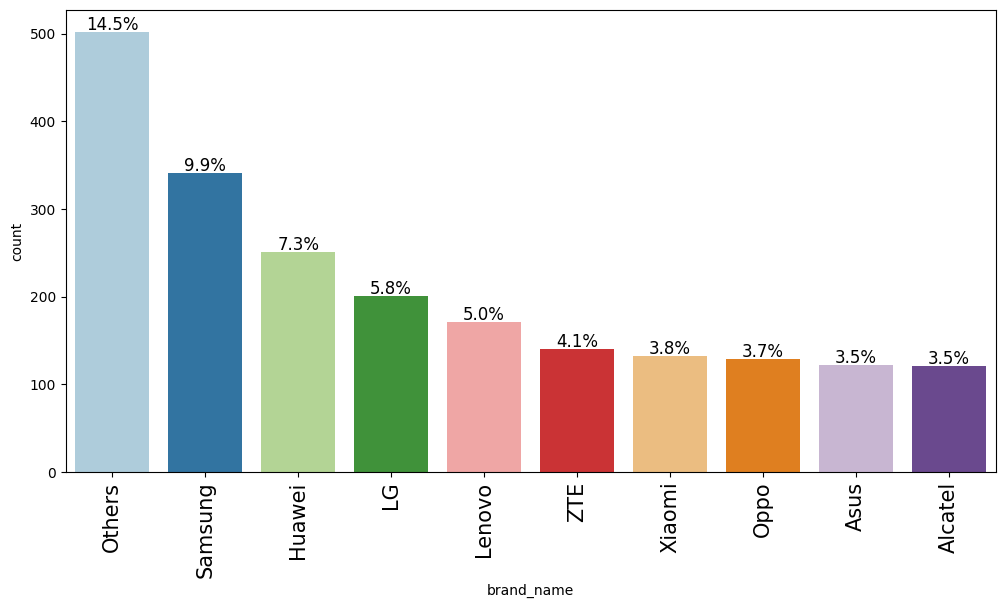

<IPython.core.display.Javascript object>

In [68]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**`os`**

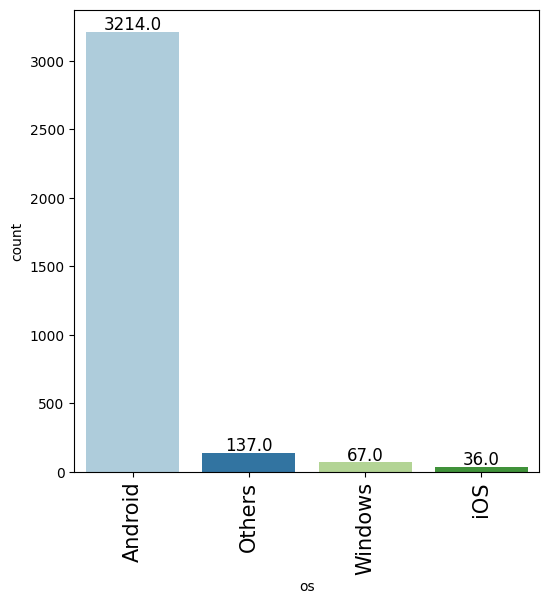

<IPython.core.display.Javascript object>

In [70]:
labeled_barplot(df, 'os') ## Complete the code to create labeled_barplot for 'os'

**`4g`**

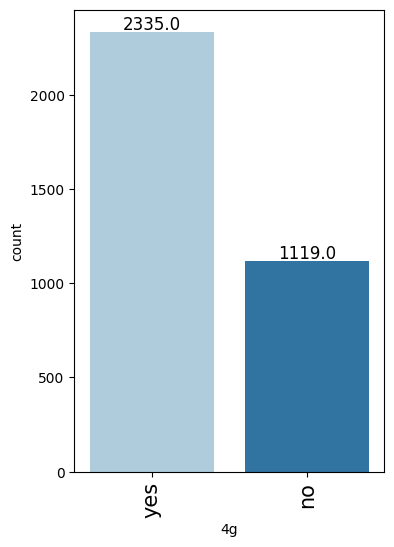

<IPython.core.display.Javascript object>

In [71]:
labeled_barplot(df, '4g') ## Complete the code to create labeled_barplot for '4g'

**`5g`**

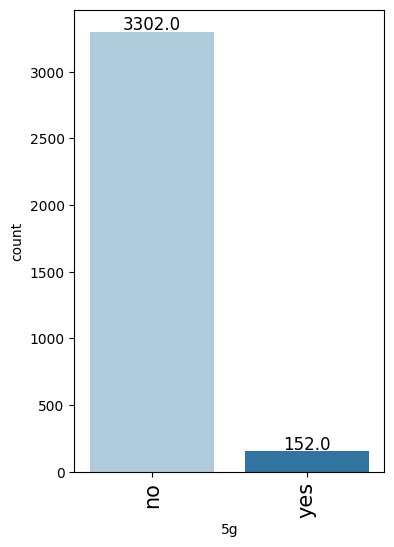

<IPython.core.display.Javascript object>

In [72]:
labeled_barplot(df,'5g') ## Complete the code to create labeled_barplot for '5g'

**`release_year`**

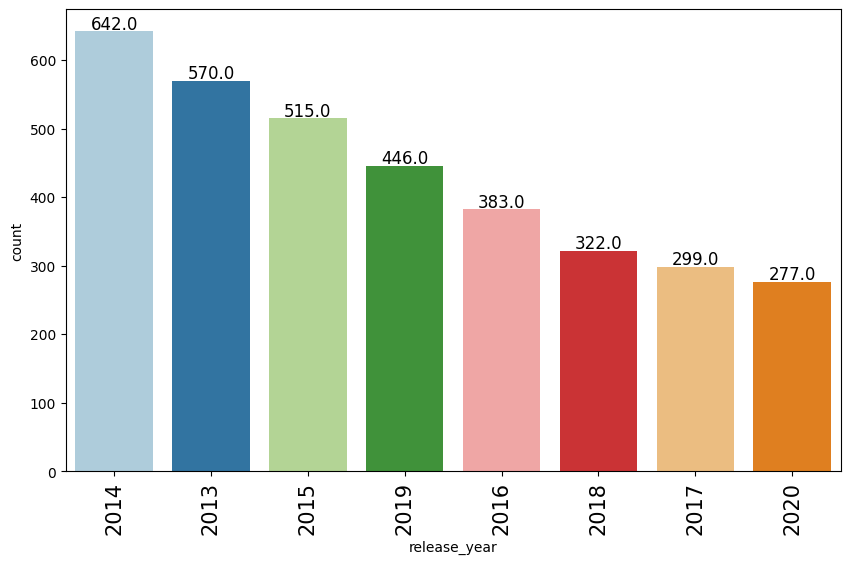

<IPython.core.display.Javascript object>

In [73]:
labeled_barplot(df, 'release_year') ## Complete the code to create labeled_barplot for 'release_year'

### Bivariate Analysis

**Correlation Check**

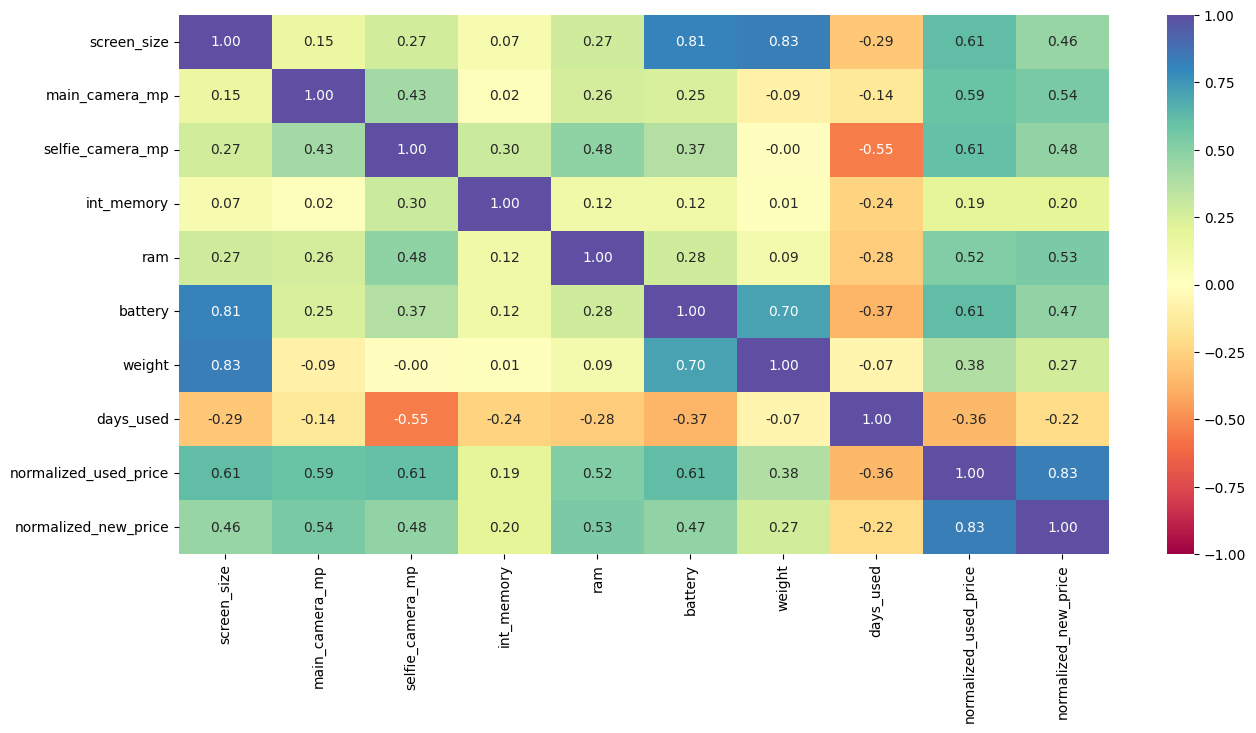

<IPython.core.display.Javascript object>

In [74]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

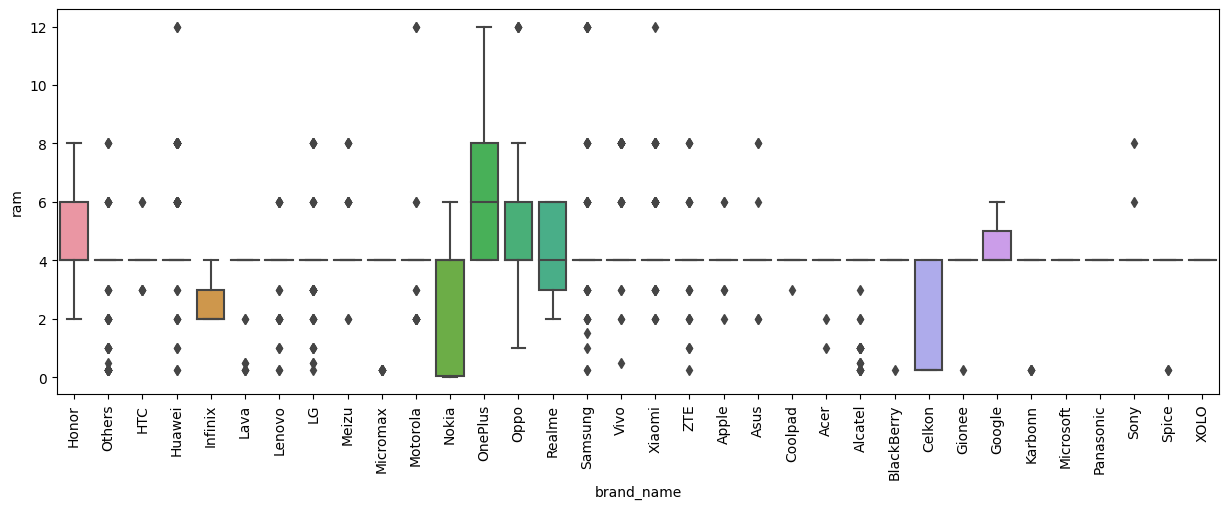

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [76]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

<IPython.core.display.Javascript object>

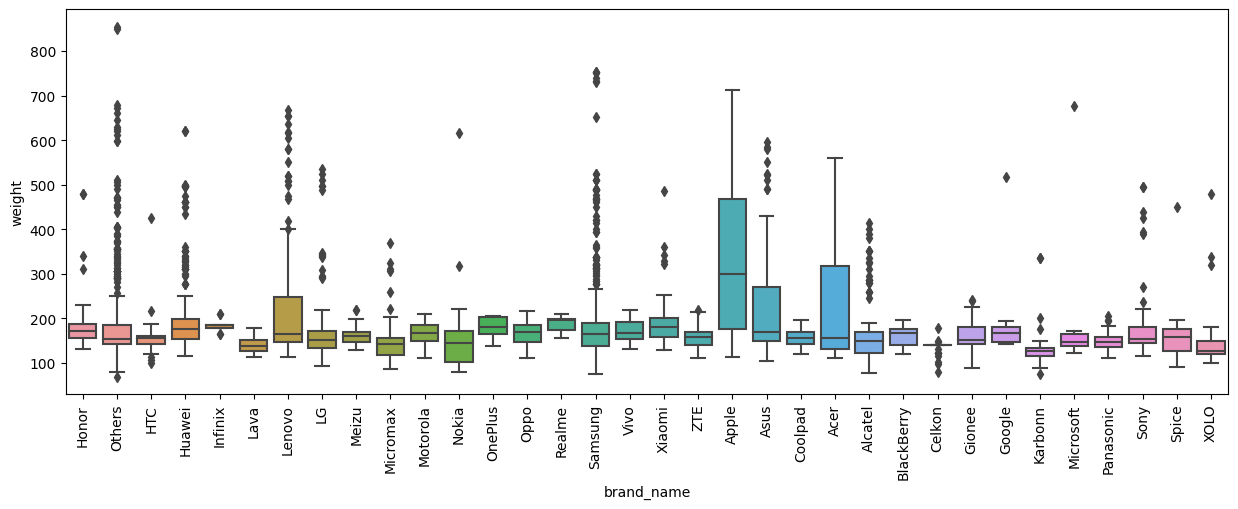

<IPython.core.display.Javascript object>

In [79]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='brand_name', y='weight', data=df) ## Complete the code to create a boxplot for 'brand_name' and 'weight' # https://builtin.com/data-science/boxplot
plt.xticks(rotation=90)
plt.show()

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [80]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

<IPython.core.display.Javascript object>

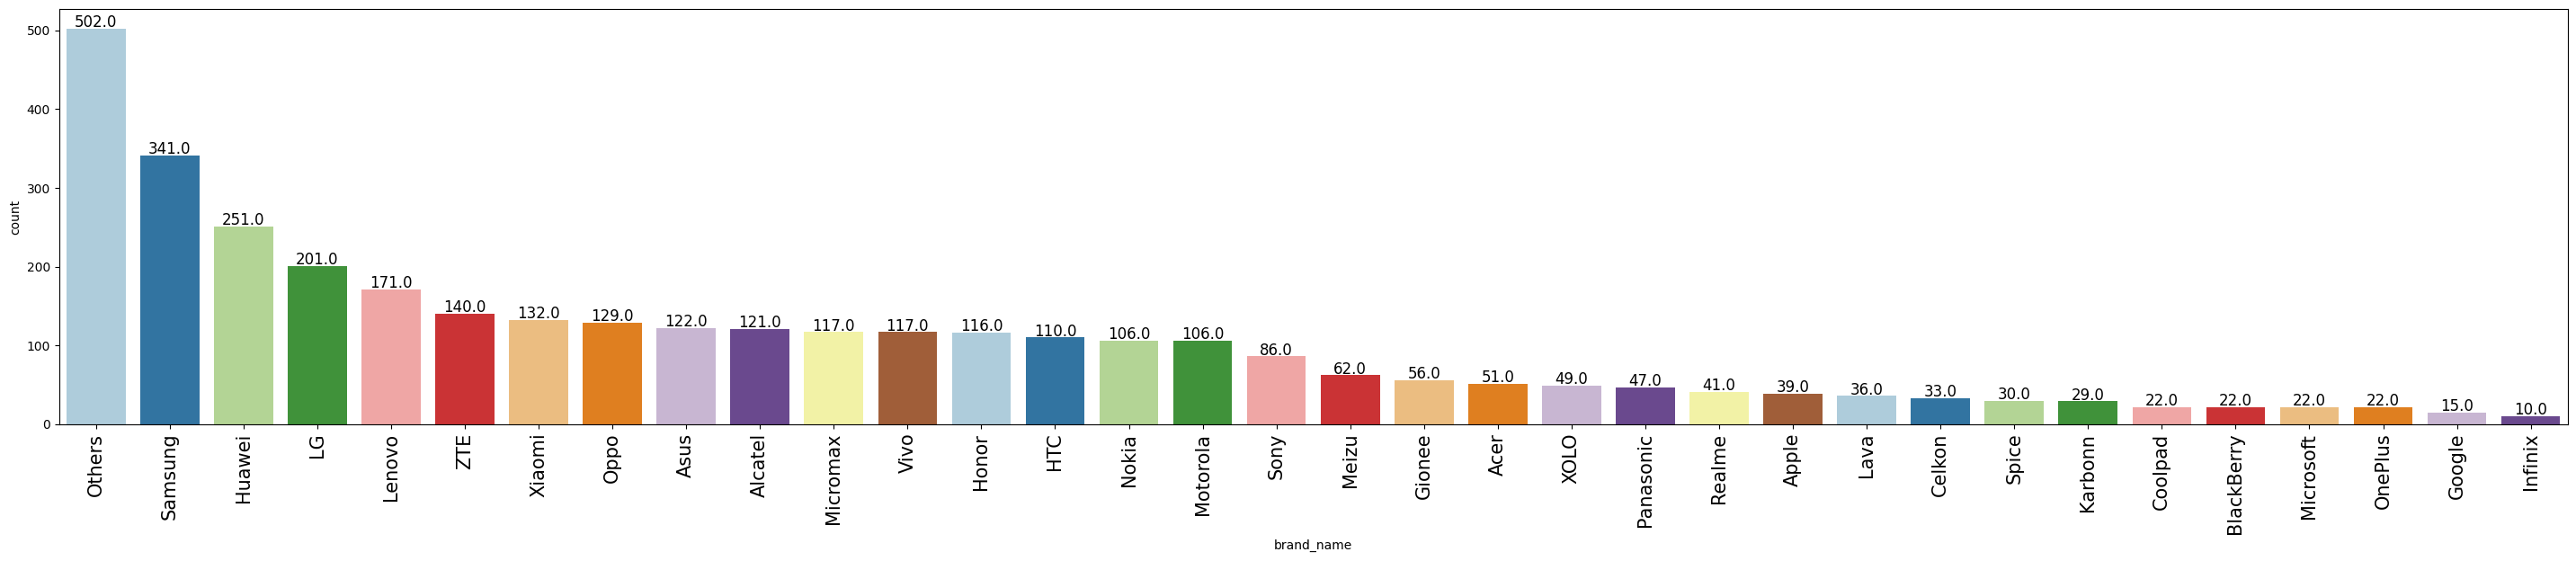

<IPython.core.display.Javascript object>

In [81]:
labeled_barplot(df, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [82]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

<IPython.core.display.Javascript object>

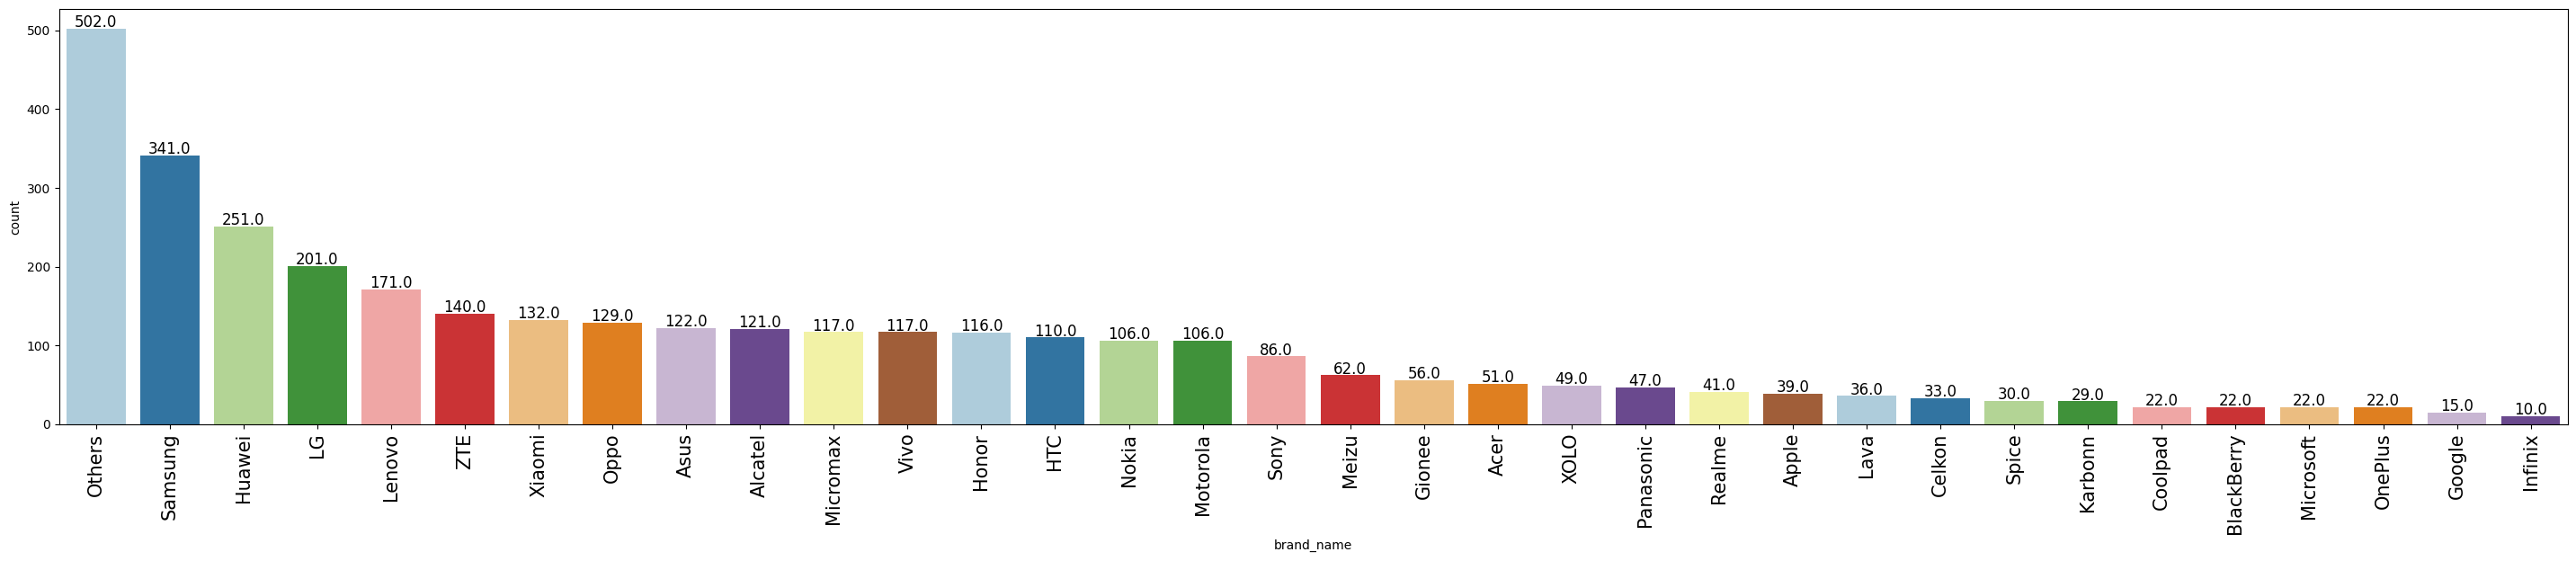

<IPython.core.display.Javascript object>

In [83]:
labeled_barplot(df, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [84]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

<IPython.core.display.Javascript object>

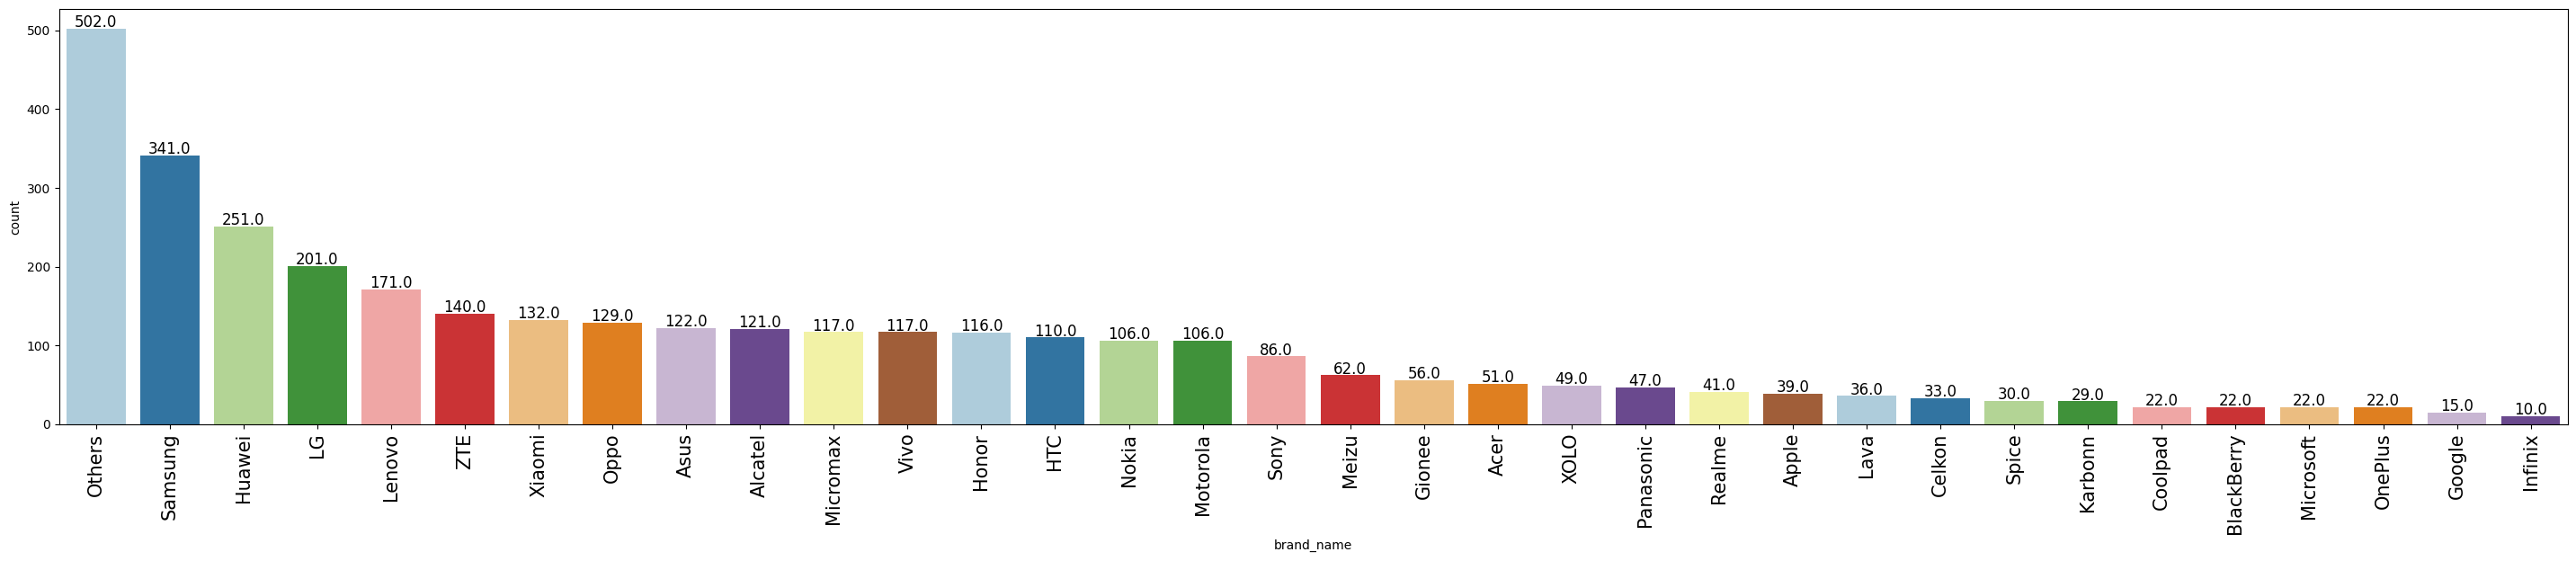

<IPython.core.display.Javascript object>

In [85]:
labeled_barplot(df,'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

**Let's see how the price of used devices varies across the years.**

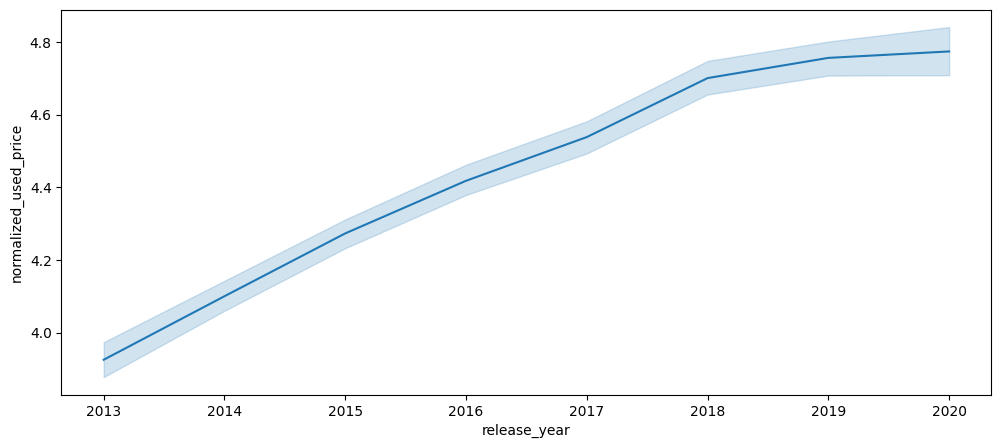

<IPython.core.display.Javascript object>

In [88]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price") ## Complete the code to create a lineplot for release year and used price # release_year normalized_used_price # https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.show()

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

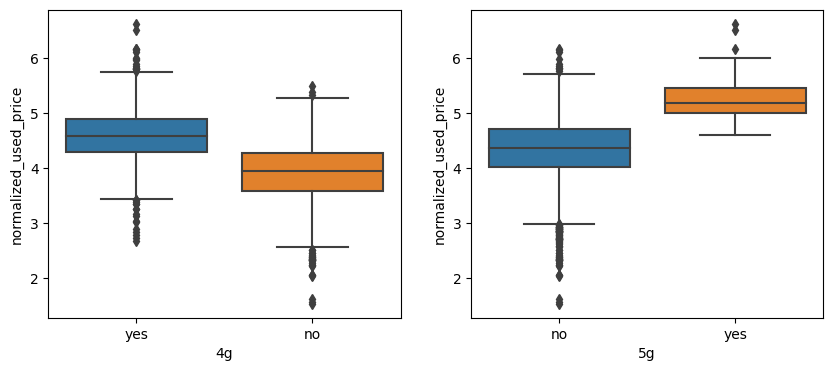

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [90]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [92]:
# checking for missing values
df1.isna() ## Complete the code to check missing values in all the columns

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3452,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<IPython.core.display.Javascript object>

In [93]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year','brand_name'])[col].transform("median") # https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name 

# checking for missing values
df1.isna() ## Complete the code to check missing values after imputing the above columns

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3452,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<IPython.core.display.Javascript object>

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [94]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isna() ## Complete the code to check missing values after imputing the above columns

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3452,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<IPython.core.display.Javascript object>

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [100]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median) ## Complete the code to impute the data with median

# checking for missing values
df1.isna() ## Complete the code to check missing values after imputing the above columns

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3452,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<IPython.core.display.Javascript object>

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [101]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

### Outlier Check



- Let's check for outliers in the data.

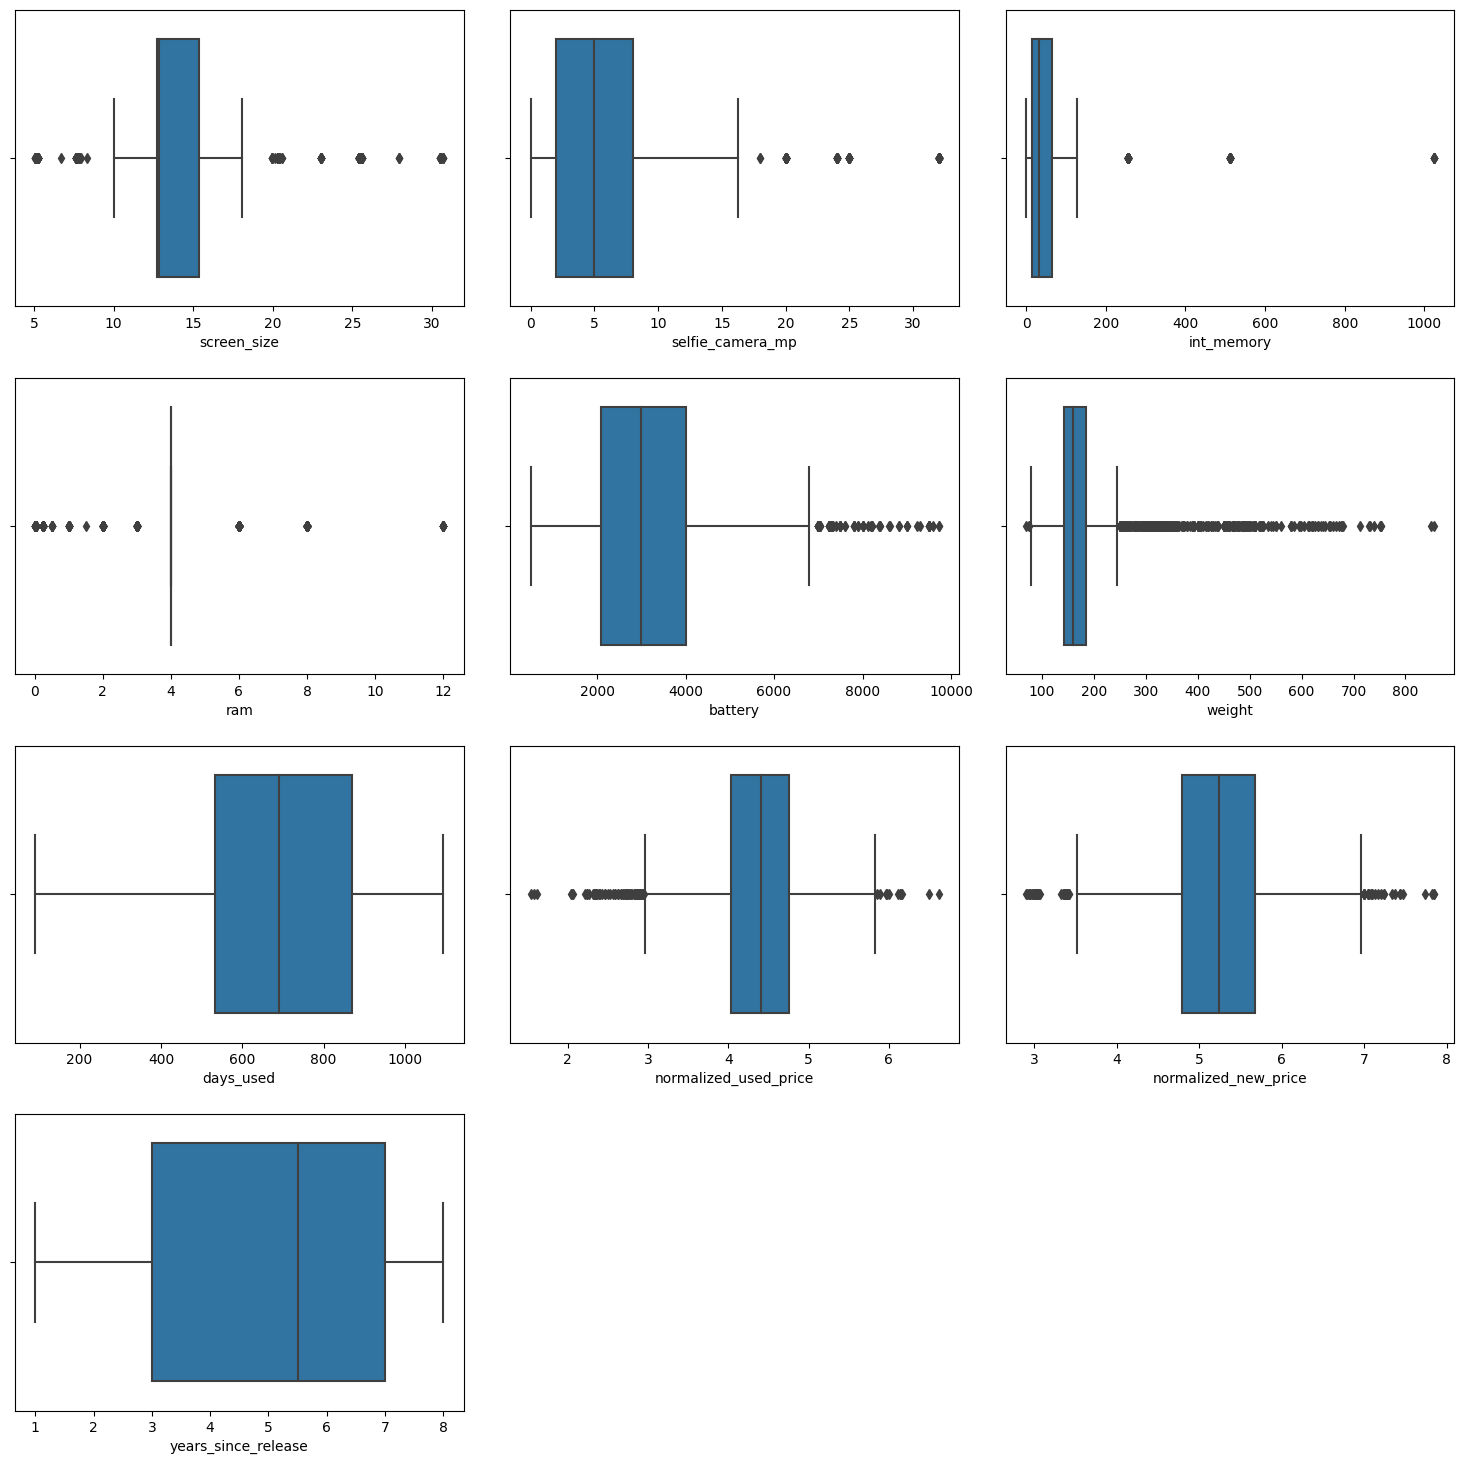

<IPython.core.display.Javascript object>

In [102]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [144]:
## Complete the code to define the dependent and independent variables
X = data.drop("normalized_used_price", axis=1)
y = data["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

<IPython.core.display.Javascript object>

In [145]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [146]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [154]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train and test in specified ratio

<IPython.core.display.Javascript object>

note y not Y

In [157]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression


In [170]:
olsmodel1 = sm.OLS(y_train, x_train, missing='drop').fit() ## Complete the code to fit OLS model
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     258.3
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           18:07:27   Log-Likelihood:                 131.14
No. Observations:                   2271   AIC:                            -168.3
Df Residuals:                       2224   BIC:                             100.9
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

for previous cell:

logit vs ols comparison

1.
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/logistic-regression/#:~:text=When%20the%20dependent%20variable%20category,not%20the%20event%20will%20occur.

2. https://datascience.stackexchange.com/questions/107323/valueerror-when-fitting-ols-model-using-statsmodels

3. https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

4.
Great Learning
Supervised Learning - Linear Regression Lessons

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [171]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [172]:
# for next cell
# https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
# df = df.reset_index()


<IPython.core.display.Javascript object>

In [173]:
# custom code cell referenced in a few cells later

# df_impute_NaNs_with_median = df

df[['main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight']] = df[['main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight']].fillna(df[['main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight']].median())


<IPython.core.display.Javascript object>

In [176]:
# custom
print("Training Performance\n")


Training Performance



<IPython.core.display.Javascript object>

In [177]:
print(olsmodel1)

<IPython.core.display.Javascript object>

In [178]:
x_train

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,2014,819,...,0,0,1,0,0,0,0,0,0,0
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,2016,585,...,0,0,0,0,0,0,0,0,1,0
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,2015,727,...,0,0,0,0,0,0,0,0,0,0
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,...,0,0,1,0,0,0,0,0,1,0
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,2017,560,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1.0,10.29,8.0,2.0,16.0,4.0,2100.0,155.0,2013,802,...,1,0,0,0,0,0,0,0,0,0
905,1.0,10.29,5.0,0.3,16.0,4.0,1800.0,145.0,2013,850,...,0,0,0,0,0,0,0,0,0,0
1096,1.0,15.77,13.0,24.0,64.0,4.0,3400.0,162.0,2018,720,...,0,0,0,0,0,0,0,0,1,0
235,1.0,15.90,13.0,32.0,128.0,6.0,3750.0,172.0,2019,311,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [179]:
# impute x_train NaNs with medians
x_train = x_train.fillna(df.median())


C:\Users\steph\AppData\Local\Temp\ipykernel_22976\1735403215.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_train = x_train.fillna(df.median())


<IPython.core.display.Javascript object>

In [180]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23071,0.181443,0.843769,0.840535,4.348495


<IPython.core.display.Javascript object>

for previous cell:
https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for

https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

In [182]:
print(df)

      level_0  index brand_name       os  screen_size   4g   5g  \
0           0      0      Honor  Android        14.50  yes   no   
1           1      1      Honor  Android        17.30  yes  yes   
2           2      2      Honor  Android        16.69  yes  yes   
3           3      3      Honor  Android        25.50  yes  yes   
4           4      4      Honor  Android        15.32  yes   no   
...       ...    ...        ...      ...          ...  ...  ...   
3449     3449   3449       Asus  Android        15.34  yes   no   
3450     3450   3450       Asus  Android        15.24  yes   no   
3451     3451   3451    Alcatel  Android        15.80  yes   no   
3452     3452   3452    Alcatel  Android        15.80  yes   no   
3453     3453   3453    Alcatel  Android        12.83  yes   no   

      main_camera_mp  selfie_camera_mp  int_memory  ram  battery  weight  \
0               13.0               5.0        64.0  3.0   3020.0   146.0   
1               13.0              16.0     

<IPython.core.display.Javascript object>

In [183]:
df.columns[df.isna().any()].tolist()

[]

<IPython.core.display.Javascript object>

TODO: main_camera_mp -> not interpolate

use median for all cols with NaN's

['main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight']

In [184]:
# # df_impute_NaNs_with_median = df

# df[['main_camera_mp',
#  'selfie_camera_mp',
#  'int_memory',
#  'ram',
#  'battery',
#  'weight']] = df[['main_camera_mp',
#  'selfie_camera_mp',
#  'int_memory',
#  'ram',
#  'battery',
#  'weight']].fillna(df[['main_camera_mp',
#  'selfie_camera_mp',
#  'int_memory',
#  'ram',
#  'battery',
#  'weight']].median())


<IPython.core.display.Javascript object>

For above cell and issue with NaN's:

Reference:
https://www.statology.org/pandas-fillna-with-median/

df[['col1', 'col2']] = df[['col1', 'col2']].fillna(df[['col1', 'col2']].median())


In [187]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_train, y_train) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23071,0.181443,0.843769,0.840535,4.348495


<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [236]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [237]:
checking_vif(x_train)  ## Complete the code to check VIF on train data

,feature,VIF
0,const,3.780344e+06
1,screen_size,7.680705e+00
2,main_camera_mp,2.136597e+00
3,selfie_camera_mp,2.808416e+00
4,int_memory,1.361465e+00
5,ram,2.258272e+00
6,battery,4.073582e+00
7,weight,6.380746e+00
8,release_year,4.884645e+00
9,days_used,2.669393e+00


<IPython.core.display.Javascript object>

In [238]:
# custom
VIF_raw=checking_vif(x_train)  ## Complete the code to check VIF on train data

<IPython.core.display.Javascript object>

In [239]:
print(VIF_raw)

                  feature           VIF
0                   const  3.780344e+06
1             screen_size  7.680705e+00
2          main_camera_mp  2.136597e+00
3        selfie_camera_mp  2.808416e+00
4              int_memory  1.361465e+00
5                     ram  2.258272e+00
6                 battery  4.073582e+00
7                  weight  6.380746e+00
8            release_year  4.884645e+00
9               days_used  2.669393e+00
10   normalized_new_price  3.121941e+00
11     brand_name_Alcatel  3.405629e+00
12       brand_name_Apple  1.305691e+01
13        brand_name_Asus  3.330500e+00
14  brand_name_BlackBerry  1.632240e+00
15      brand_name_Celkon  1.773986e+00
16     brand_name_Coolpad  1.466522e+00
17      brand_name_Gionee  1.951248e+00
18      brand_name_Google  1.322242e+00
19         brand_name_HTC  3.409765e+00
20       brand_name_Honor  3.345910e+00
21      brand_name_Huawei  5.986382e+00
22     brand_name_Infinix  1.283540e+00
23     brand_name_Karbonn  1.573183e+00


<IPython.core.display.Javascript object>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [240]:
VIF_raw.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,3.780344e+06
12,brand_name_Apple,1.305691e+01
46,os_iOS,1.178485e+01
34,brand_name_Others,9.710790e+00
1,screen_size,7.680705e+00
37,brand_name_Samsung,7.539528e+00
7,weight,6.380746e+00
21,brand_name_Huawei,5.986382e+00
8,release_year,4.884645e+00
24,brand_name_LG,4.848734e+00


<IPython.core.display.Javascript object>

In [241]:
# https://stackoverflow.com/questions/49153253/pandas-rounding-when-converting-float-to-integer

VIF_raw['VIF']=VIF_raw['VIF'].round(2).astype(float)


<IPython.core.display.Javascript object>

In [242]:
print(VIF_raw)

                  feature         VIF
0                   const  3780344.20
1             screen_size        7.68
2          main_camera_mp        2.14
3        selfie_camera_mp        2.81
4              int_memory        1.36
5                     ram        2.26
6                 battery        4.07
7                  weight        6.38
8            release_year        4.88
9               days_used        2.67
10   normalized_new_price        3.12
11     brand_name_Alcatel        3.41
12       brand_name_Apple       13.06
13        brand_name_Asus        3.33
14  brand_name_BlackBerry        1.63
15      brand_name_Celkon        1.77
16     brand_name_Coolpad        1.47
17      brand_name_Gionee        1.95
18      brand_name_Google        1.32
19         brand_name_HTC        3.41
20       brand_name_Honor        3.35
21      brand_name_Huawei        5.99
22     brand_name_Infinix        1.28
23     brand_name_Karbonn        1.57
24          brand_name_LG        4.85
25        br

<IPython.core.display.Javascript object>

In [243]:
VIF_raw.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,3780344.20
12,brand_name_Apple,13.06
46,os_iOS,11.78
34,brand_name_Others,9.71
1,screen_size,7.68
37,brand_name_Samsung,7.54
7,weight,6.38
21,brand_name_Huawei,5.99
8,release_year,4.88
24,brand_name_LG,4.85


<IPython.core.display.Javascript object>

### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [244]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [245]:
# custom
print(df)

      level_0  index brand_name       os  screen_size   4g   5g  \
0           0      0      Honor  Android        14.50  yes   no   
1           1      1      Honor  Android        17.30  yes  yes   
2           2      2      Honor  Android        16.69  yes  yes   
3           3      3      Honor  Android        25.50  yes  yes   
4           4      4      Honor  Android        15.32  yes   no   
...       ...    ...        ...      ...          ...  ...  ...   
3449     3449   3449       Asus  Android        15.34  yes   no   
3450     3450   3450       Asus  Android        15.24  yes   no   
3451     3451   3451    Alcatel  Android        15.80  yes   no   
3452     3452   3452    Alcatel  Android        15.80  yes   no   
3453     3453   3453    Alcatel  Android        12.83  yes   no   

      main_camera_mp  selfie_camera_mp  int_memory  ram  battery  weight  \
0               13.0               5.0        64.0  3.0   3020.0   146.0   
1               13.0              16.0     

<IPython.core.display.Javascript object>

In [246]:
print(x_train)

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   
...     ...          ...             ...               ...         ...  ...   
2763    1.0        10.29             8.0               2.0        16.0  4.0   
905     1.0        10.29             5.0               0.3        16.0  4.0   
1096    1.0        15.77            13.0              24.0        64.0  4.0   
235     1.0        15.90            13.0              32.0       128.0  6.0   
1061    1.0        12.70            13.0               5.0        16.0  4.0   

      battery  weight  release_year  days_used  ...

<IPython.core.display.Javascript object>

In [247]:
col_list = ['const'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,const,0.997191,0.23354


<IPython.core.display.Javascript object>

In [250]:
col_to_drop = 'const' ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  const


,feature,VIF
0,screen_size,102.697326
1,main_camera_mp,10.552323
2,selfie_camera_mp,4.665903
3,int_memory,1.951998
4,ram,21.519290
5,battery,26.604086
6,weight,32.209269
7,release_year,222.293780
8,days_used,15.875491
9,normalized_new_price,175.549622


<IPython.core.display.Javascript object>

In [251]:
print(vif)

                  feature         VIF
0             screen_size  102.697326
1          main_camera_mp   10.552323
2        selfie_camera_mp    4.665903
3              int_memory    1.951998
4                     ram   21.519290
5                 battery   26.604086
6                  weight   32.209269
7            release_year  222.293780
8               days_used   15.875491
9    normalized_new_price  175.549622
10     brand_name_Alcatel    3.528177
11       brand_name_Apple   13.214485
12        brand_name_Asus    3.445977
13  brand_name_BlackBerry    1.643453
14      brand_name_Celkon    1.782172
15     brand_name_Coolpad    1.474978
16      brand_name_Gionee    1.977358
17      brand_name_Google    1.321877
18         brand_name_HTC    3.529252
19       brand_name_Honor    3.455290
20      brand_name_Huawei    6.455794
21     brand_name_Infinix    1.287297
22     brand_name_Karbonn    1.581272
23          brand_name_LG    5.135325
24        brand_name_Lava    1.728417
25      bran

<IPython.core.display.Javascript object>

In [252]:
vif.sort_values(by=['VIF'], ascending=False)

,feature,VIF
7,release_year,222.293780
9,normalized_new_price,175.549622
0,screen_size,102.697326
6,weight,32.209269
5,battery,26.604086
4,ram,21.519290
8,days_used,15.875491
11,brand_name_Apple,13.214485
45,os_iOS,11.929075
33,brand_name_Others,11.324508


<IPython.core.display.Javascript object>

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = '_____'.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

In [ ]:
x_train3 = '____'[selected_features]  ## Complete the code to specify the train data from which to select the specified columns
x_test3 = '____'[selected_features]  ## Complete the code to specify the test data from which to select the specified columns

In [ ]:
olsmodel2 = sm.'_______' ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression('_______') ## Complete the code to check performance on train data
olsmodel2_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression('_______') ## Complete the code to check performance on test data
olsmodel2_test_perf

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

In [ ]:
sns.histplot(data=df_pred, '_______') ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot('_____', dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

In [ ]:
stats.shapiro('_______') ## Complete the code to apply the Shapiro-Wilks test

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], '_____') ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

## Final Model Summary

In [ ]:
olsmodel_final = sm.'_______' ## Complete the code to fit the final model
print(olsmodel_final.summary())

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression('_______') ## Complete the code to check the performance on train data
olsmodel_final_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression('_______') ## Complete the code to check performance on test data
olsmodel_final_test_perf

##  Actionable Insights and Recommendations

- 


---------